
# Neural Networks


This project explores the application of artificial neural networks (ANN) in both classification and regression tasks. We use three different methods for ANN implementation: a) NumPy, b) Scikit-learn, and c) Keras (with TensorFlow backend). Additionally, we compare the performance of ANN with Decision Tree models for both tasks.




    

# Structure of Neural Networks

\begin{definition}
Within an artificial neural network (ANN), a neuron is a mathematical function that model the functioning of a biological neuron. Typically, a neuron compute the weighted average of its input, and this sum is passed through a nonlinear function, often called activation function, such as the sigmoid.

![](ANN.png)

![](content_content_neuron.png)

\end{definition}


__transfer function between neurons__

- The sigmoid equation is what is typically used as a transfer function between neurons. It is similar to the step fuction, but is continuous and differentiable.

$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

- One useful property of this transfer function is the simplicity of computing its derivative.

$$\frac{d}{dx}\sigma(x) = \sigma' = \sigma(x) (1-\sigma(x))$$

__Single input neuron__

<img src="./image_files/single_neuron.png" width = 300>

$$ O = \sigma(\xi \omega + \theta) $$

__Multiple input neuron__

<img src="./image_files/multiple_neuron.png" width = 300>

$$ O = \sigma(\xi_1 \omega_1 + \xi_2 \omega_2 + \xi_3 \omega_3 +\theta) $$

__A neural network__

<img src="./image_files/nn_03.png" width = 300>

# Schematic Description of Neural Network Algorithm 
![](https://cdn.mathpix.com/snip/images/BNm1t92nEvmj7bnmNZZMEpOgR8bNVfI-JELGa3uTJDw.original.fullsize.png)

Figure 1 - The loss score is used as a feedback signal to adjust the weights

# Learning: Backpropagation Algorithm

__Notation__

- $x_j^\ell$: Input to node $j$ of layer $\ell$

- $W_{ij}^\ell$: Weight from layer $\ell - 1$ node $i$ to layer $\ell$ node $j$

- $\sigma(x) = \frac{1}{1+e^{-x}}$: Sigmoid transfer function

- $\theta_j^{\ell}$: Bias of node $j$ of layer $\ell$

- $O_j^{\ell}$: Output of node $j$ in layer $\ell$

- $t_j$: Target value of node $j$ of the output layer

<br>
<font size='4'><b>The error calculation</b></font>

Given a set of training data points $t_k$ and output layer output $O_k$ we can write the error as

$$ E = \frac{1}{2} \sum_{k \in K} (O_k - t_k)^2$$

We want to calculate $\frac{\partial E}{\partial W_{jk}^{\ell}}$, the rate of change of the error with respect to the given connective weight, so we can minimize it.

Now we consider two cases: the node is an output node, or it is in a hidden layer

__1) Output layer node__

\begin{align*}
\frac{\partial E}{\partial W_{jk}} &= \frac{\partial}{\partial W_{jk}} \frac{1}{2} (O_k - t_k)^2 = (O_k - t_k)\frac{\partial}{\partial W_{jk}} O_k = (O_k - t_k)\frac{\partial}{\partial W_{jk}} \sigma(x_k)\\
&= (O_k - t_k) \sigma(x_k) (1-\sigma(x_k)) \frac{\partial}{\partial W_{jk}} x_k \\
&= (O_k - t_k) O_k (1 - O_k) O_j
\end{align*}

$\quad$For notation purposes, I will define $\delta_k$ to be the expression $(O_k - t_k) O_k (1 - O_k)$, so we can rewrite the equation above as

$$\frac{\partial E}{\partial W_{jk}} = O_j \delta_k $$

__2) Hidden layer node__

\begin{align*}
\frac{\partial E}{\partial W_{ij}} &= \frac{\partial}{\partial W_{ij}} \frac{1}{2} \sum_{k \in K} (O_k - t_k)^2 = \sum_{k \in K} (O_k - t_k)\frac{\partial}{\partial W_{ij}} O_k = \sum_{k \in K} (O_k - t_k)\frac{\partial}{\partial W_{ij}} \sigma(x_k)\\
&= \sum_{k \in K} (O_k - t_k) \sigma(x_k) (1-\sigma(x_k)) \frac{\partial}{\partial W_{ij}} x_k \\
&= \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) \frac{\partial x_k}{\partial O_j}\cdot \frac{\partial O_j}{\partial W_{ij}} = \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\cdot \frac{\partial O_j}{\partial W_{ij}}\\
&= \frac{\partial O_j}{\partial W_{ij}} \cdot \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\\
&= O_j (1-O_j)\frac{\partial x_j}{\partial W_{ij}} \cdot \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\\
&= O_j (1-O_j)O_i \cdot \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\\
&= O_i O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}
\end{align*}

$\quad$Similar to before we will now define all terms besides $O_i$ to be $\delta_j = O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}$, so we have

$$\frac{\partial E}{\partial W_{ij}} = O_i \delta_j$$


__How weights affect errors__

- For an output layer node $k \in K$

$$\frac{\partial E}{\partial W_{jk}} = O_j \delta_k $$

$\quad \;\,$where $$\delta_k = (O_k - t_k) O_k (1 - O_k)$$

- For a hidden layer node $j \in J$

$$\frac{\partial E}{\partial W_{ij}} = O_i \delta_j$$

$\quad \;\,$where $$\delta_j = O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}$$

__What about the bias?__

If we incorporate the bias term $\theta$ into the equation you will find that

$$ \frac{\partial O}{\partial \theta} = 1$$

This is why we view the bias term as output from a node which is always one. This holds for any layer $\ell$, a substitution into the previous equations gives us that

$$ \frac{\partial E}{\partial \theta} = \delta_{\ell}$$

<br>
<font size='4'><b>The backpropagation algorithm using gradient descent</b></font>

1. Run the network forward with your input data to get the netwrok output

2. For each output node compute
$$\delta_k = (O_k - t_k) O_k (1 - O_k)$$
3. For eatch hidden node calculate
$$\delta_j = O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}$$
4. Update the weights and biases as follows<br>
Given
\begin{align*}
\Delta W &= -\eta \delta_{\ell} O_{\ell -1}\\
\Delta \theta &= -\eta \delta_{\ell}
\end{align*}
apply
\begin{align*}
W &\leftarrow W + \Delta W \\
\theta &\leftarrow \theta + \Delta \theta
\end{align*}



In [2]:
%%html
<iframe src="https://www.youtube.com/embed/aVId8KMsdUU?list=PL29C61214F2146796" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [1]:
%%html
<iframe src="https://www.youtube.com/embed/zpykfC4VnpM?list=PL29C61214F2146796" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

# Implementation in python

Try to be very explicit about what parts are "up in the air" (i.e. modifiable) so you get a sense of where you can experiment with new neural networks.

- [ml4a chapter on neural networks](http://ml4a.github.io/ml4a/neural_networks/). 

- Michael Nielsen's [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/), 

- Goodfellow, Bengio, and Courville's [Deep Learning](http://www.deeplearningbook.org/) book

- Yoav Goldberg's "[A Primer on Neural Network Models for Natural Language Processing](http://arxiv.org/abs/1510.00726)". 


For the other neural network guides we will mostly rely on the excellent [Keras](http://keras.io/) library, which makes it very easy to build neural networks and can take advantage of [Theano](http://deeplearning.net/software/theano/) or [TensorFlow](https://www.tensorflow.org/)'s optimizations and speed. However, to demonstrate the basics of neural networks, we'll use `numpy` so we can see exactly what's happening every step of the way.

Each unit (neuron) has a vector of weights - these are the parameters that the network learns.

The inner operations of the basic unit is straightforward. We collapse the weight vector $w$ and input vector $v$ into a scalar by taking their dot product. Often a _bias_ term $b$ is added to this dot product; this bias is also learned. then we pass this dot product through an _activation function_ $f$, which also returns a scalar. Activation functions are typically nonlinear so that neural networks can learn nonlinear functions. I'll mention a few common activation functions in a bit, but for now let's see what a basic unit is doing:

```python
def unit(inputs, weights, b):
    return activation_function(np.dot(inputs, weights) + b)
```

Note that the output units often do not have an activation function.

## A basic neural network with `numpy`

First we'll import `numpy`:

In [ ]:
import numpy as np

With machine learning we are trying to find a hidden function that describes data that we have. Here we are going to cheat a little and define the function ourselves and then use that to generate data. Then we'll try to "reverse engineer" our data and see if we can recover our original function.

In [ ]:
def unknown_function(X):
    coeff = np.array([[2., -1., 5.]])
    return np.dot(X, coeff.T)

X = np.array([
    [4.,9.,1.],
    [2.,5.,6.],
    [1.,8.,3.]
])

t = unknown_function(X) # target
print(t)

[[ 4.]
 [29.]
 [ 9.]]


Now we are going to set up our simple neural network. It will have just one hidden layer with two units (which we will refer to as unit 1 and unit 2).

<img src="./image_files/simple_nn_structure.png" width = 250>

First we have to define the weights (i.e. parameters) of our network.

- **We have three inputs each going into two units, then one bias value for each unit, so we have eight parameters for the hidden layer.**

- **Then we have the output of those two hidden layer units going to the output layer, which has only one unit - this gives us two more parameters, plus one bias value.**

- **So in total, we have eleven parameters.**

Let's set them to arbitrary values for now (random initialization).

In [ ]:
# initial hidden layer weights
hidden_layer_weights = np.array([
    [0.5, 0.5, 0.5],    # unit 1
    [0.1, 0.1, 0.1]     # unit 2
])
hidden_layer_biases = np.array([1. ,1.])

# initial output layer weights
output_weights = np.array([[1., 1.]])
output_biases = np.array([1.])

## Activation Functions
![](activation_functions.png)


We'll use $\tanh$ activations for our hidden units, so let's define that real quick:

In [ ]:
def activation(X):
    return np.tanh(X)

- $\tanh$ activations are quite common, but you may also encounter sigmoid activations and, more recently, 

- ReLU activations (which output 0 when $x \leq 0$ and output $x$ otherwise). These activation functions have different benefits: 

- ReLUs in particular are robust against training difficulties that come when dealing with deeper networks.

To make things clearer later on, we'll also define the linear function that combines a unit's input with its weights:

In [ ]:
# linear regression function

def linear(input, weights, biases):
    return np.dot(input, weights.T) + biases

Now we can do a forward pass with our inputs $X$ to see what the predicted outputs are.

## Forward pass

**First, we'll pass the input through the hidden layer:**

In [ ]:
hidden_linout = linear(X, hidden_layer_weights, hidden_layer_biases)
hidden_output = activation(hidden_linout)

print('hidden output')
print(hidden_output)

hidden output
[[0.99999977 0.98367486]
 [0.99999939 0.9800964 ]
 [0.99999834 0.97574313]]


(We're keeping the neuron unit's intermediary value, `hidden_linout` for use in backpropagation.)

**Then we'll take the hidden layer's output and pass it through the output layer to get our predicted outputs:**

In [ ]:
hidden_linout = linear(X, hidden_layer_weights, hidden_layer_biases)
hidden_output = activation(hidden_linout)


output_linout = linear(hidden_output, output_weights, output_biases)
output_output = output_linout # no activation function on output layer

predicted = output_output
print('predicted')
print(predicted)

mse = np.mean((t - predicted)**2)
print('mean squared error')
print(mse)

predicted
[[2.98367463]
 [2.98009578]
 [2.97574147]]


Now let's compute the mean squared error of our predictions:

In [ ]:
mse = np.mean((t - predicted)**2)
print('mean squared error')
print(mse)

mean squared error
238.12000783695962


Now we can take this error and backpropagate it through the network. This will tell us how to update our weights.

## Backpropagation

Since backpropagation is essentially a chain of derivatives (that is used for gradient descent), we'll need the derivative of our activation function, so let's define that first:

In [ ]:
def activation_deriv(X):
    return 1 - np.tanh(X)**2

Then we want to set a learning rate - this is a value from 0 to 1 which affects how large we tweak our parameters by for each training iteration.

- You don't want to set this to be too large or else training will never converge (your parameters might get really big and you'll start seeing a lot of `nan` values).

- You don't want to set this to be too small either, otherwise training will be very slow. There are more sophisticated forms of gradient descent that deal with this, but those are beyond the scope of this guide.

In [ ]:
learning_rate = 0.001

First we'll propagate the error through the output layer (I won't go through the derivation of each step but they are straightforward to work out if you know a bit about derivatives):

![](bp.svg)

In [ ]:
# derivative of mean squared error
error = predicted - t

# delta for the output layer (no activation on output layer)
delta_output = error

# output layer updates
output_weights_update = delta_output.T.dot(hidden_output)
output_biases_update = delta_output.sum(axis=0)

Then through the hidden layer:

In [ ]:
# push back the delta to the hidden layer
delta_hidden = delta_output*output_weights*activation_deriv(hidden_linout)

# hidden layer updates
hidden_weights_update = delta_hidden.T.dot(X)
hidden_biases_update = delta_hidden.sum(axis=0)

Then we can apply the updates:

In [ ]:
output_weights -= output_weights_update*learning_rate
output_biases -= output_biases_update*learning_rate

hidden_layer_weights -= hidden_weights_update*learning_rate
hidden_layer_biases -= hidden_biases_update*learning_rate

That's one training iteration! In reality, you would do this many, many times - feedforward, backpropagate, update weights, then rinse and repeat. That's the basics of a neural network - at least, the "vanilla" kind. There are other more sophisticated kinds (recurrent and convolutional neural networks are two of the most common) that are covered in other guides.

In [ ]:
print (predicted)

[[2.98367463]
 [2.98009578]
 [2.97574147]]


## 3.4. Neural Networks in python

In [ ]:
# hidden layer weights
hidden_layer_weights = np.array([
    [0.5, 0.5, 0.5],    # unit 1
    [0.1, 0.1, 0.1]     # unit 2
])
hidden_layer_biases = np.array([1. ,1.])

# output layer weights
output_weights = np.array([[1., 1.]])
output_biases = np.array([1.])

for i in range(10000):
    
    hidden_linout = linear(X, hidden_layer_weights, hidden_layer_biases)
    hidden_output = activation(hidden_linout)
    
    output_linout = linear(hidden_output, output_weights, output_biases)
    output_output = output_linout # no activation function on output layer

    predicted = output_output

    # derivative of mean squared error
    error = predicted - t

    # delta for the output layer (no activation on output layer)
    delta_output = error

    # output layer updates
    output_weights_update = delta_output.T.dot(hidden_output)
    output_biases_update = delta_output.sum(axis = 0)

    # push back the delta to the hidden layer
    delta_hidden = delta_output*output_weights*activation_deriv(hidden_linout)

    # hidden layer updates
    hidden_weights_update = delta_hidden.T.dot(X)
    hidden_biases_update = delta_hidden.sum(axis = 0)

    output_weights -= output_weights_update*learning_rate
    output_biases -= output_biases_update*learning_rate

    hidden_layer_weights -= hidden_weights_update*learning_rate
    hidden_layer_biases -= hidden_biases_update*learning_rate

print (t)    
print (predicted)

[[ 4.]
 [29.]
 [ 9.]]
[[ 4.96752766]
 [28.97734771]
 [ 8.55822613]]


# ANN Regression Example using sklearn

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

C:\Users\enh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076593

# Regression with a deep neural network (DNN) using keras
In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer, as before (with `horsepower_normalizer` for a single-input model and `normalizer` for a multiple-input model).

* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.

* A linear `Dense` single-output layer.

Both models will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

# Keras Tutorial Overview

There is not a lot of code required, but we are going to step over it slowly so that you will know how to create your own models in the future.

The steps you are going to cover in this tutorial are as follows:

* Load Data.
* Define Keras Model.
* Compile Keras Model.
* Fit Keras Model.
* Evaluate Keras Model.
* Tie It All Together.
* Make Predictions

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.



Kick-start your project with the book **Deep Learning With Python**, including step-by-step tutorials and the Python source code files for all examples.


In [15]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
...

Ellipsis

In [59]:
...
import pandas as pd
# load the dataset
dataset = pd.read_csv('pima-indians-diabetes.data.csv', delimiter=',')
dataset.head

<bound method NDFrame.head of       6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]>

In [60]:
X = dataset.iloc[:,:-1]
X.head

<bound method NDFrame.head of       6  148  72  35    0  33.6  0.627  50
0     1   85  66  29    0  26.6  0.351  31
1     8  183  64   0    0  23.3  0.672  32
2     1   89  66  23   94  28.1  0.167  21
3     0  137  40  35  168  43.1  2.288  33
4     5  116  74   0    0  25.6  0.201  30
..   ..  ...  ..  ..  ...   ...    ...  ..
762  10  101  76  48  180  32.9  0.171  63
763   2  122  70  27    0  36.8  0.340  27
764   5  121  72  23  112  26.2  0.245  30
765   1  126  60   0    0  30.1  0.349  47
766   1   93  70  31    0  30.4  0.315  23

[767 rows x 8 columns]>

In [61]:
y = dataset.iloc[:,[8]]
y

,1
0,0
1,1
2,0
3,1
4,0
...,...
762,0
763,0
764,0
765,1


In [46]:
# define the keras model
import numpy as np
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
predictions.shape
predictions = predictions.flatten()


In [39]:
predictions.shape

(767,)

In [62]:
y = y.to_numpy().flatten()


In [40]:
predictions[1]

1

In [65]:
for i in range(5):
	print( predictions[i], y[i])
  
	  

0 0
1 1
0 0
1 1
0 0


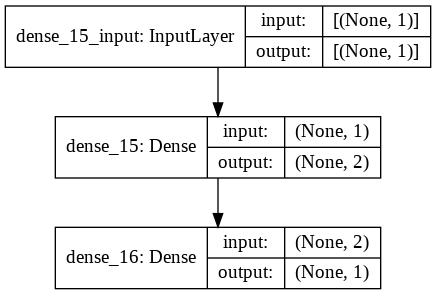

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)